# Análise HCNSW nmslib

## Imports

In [1]:
from numpy import load
from math import sqrt
from tabulate import tabulate
import matplotlib.pyplot as plt

## Constantes e funções

In [2]:
DB_NAME = "glove-50"
METHOD_NAMES = ("hnsw", "hcnsw")

In [3]:
def get_mean_and_sd(values):
    mean = sum(values)/len(values)
    s2 = (sum((x-mean)**2 for x in values))/(len(values)-1)
    s = sqrt(s2)
    return mean, s

## Teste base (seed=0)

In [4]:
recalls = {}
deltas = {}
for method_name in METHOD_NAMES:
    recalls[method_name] = load(f"data/{method_name}_{DB_NAME}_recalls.npy")
    deltas[method_name] = load(f"data/{method_name}_{DB_NAME}_deltas.npy")

In [5]:
table = []
for method_name in METHOD_NAMES:
    mean_recalls, s_recalls = get_mean_and_sd(recalls[method_name])
    mean_deltas, s_deltas = get_mean_and_sd(deltas[method_name])
    table.append((method_name, mean_recalls, s_recalls, mean_deltas, s_deltas))
table.sort(key=lambda row: row[1], reverse=True)

In [6]:
print(tabulate(table, headers=["method", "recall@100", "SD", "query time (s)", "SD"]))

method      recall@100         SD    query time (s)        SD
--------  ------------  ---------  ----------------  --------
hnsw          0.925456  0.0686424        0.00181133  0.167318
hcnsw         0.925259  0.0685414        0.00181643  0.167307


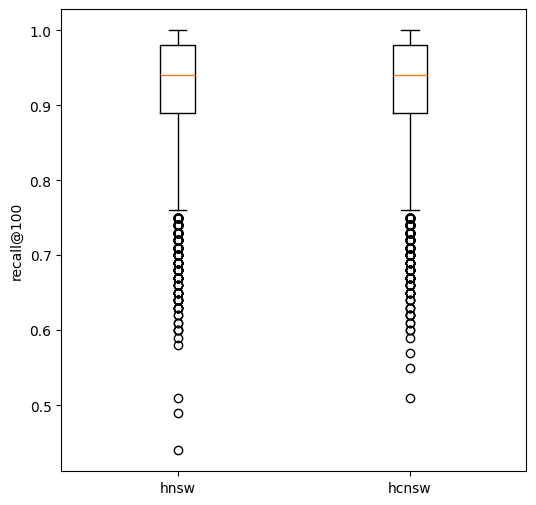

In [7]:
all_recalls = [recalls[method_name] for method_name in METHOD_NAMES]

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
ax.set_ylabel('recall@100')
bplot = ax.boxplot(all_recalls, labels=METHOD_NAMES)

plt.show()

## Variação de seeds (1 a 30)

In [4]:
SEED_RANGE = range(1, 31)

In [5]:
recalls = {}
deltas = {}
for method_name in METHOD_NAMES:
    for seed in SEED_RANGE:
        recalls[(method_name, seed)] = load(f"data/{method_name}_{DB_NAME}_seed{seed}_recalls.npy")
        deltas[(method_name, seed)] = load(f"data/{method_name}_{DB_NAME}_seed{seed}_deltas.npy")

In [6]:
table = []
for method_name in METHOD_NAMES:
    for seed in SEED_RANGE:
        mean_recalls, s_recalls = get_mean_and_sd(recalls[(method_name, seed)])
        mean_deltas, s_deltas = get_mean_and_sd(deltas[(method_name, seed)])
        table.append((method_name, seed, mean_recalls, s_recalls, mean_deltas, s_deltas, min(recalls[(method_name, seed)])))
table.sort(key=lambda row: row[2], reverse=True)

In [7]:
print(tabulate(table, headers=["method", "seed", "recall@100", "SD", "query time (s)", "SD", "min recall"]))

method      seed    recall@100        SD    query time (s)           SD    min recall
--------  ------  ------------  --------  ----------------  -----------  ------------
hnsw          25      0.793816  0.190752       0.00612996   0.587696             0.01
hnsw           7      0.793649  0.191349       0.00630792   0.604784             0.04
hnsw           2      0.793597  0.191058       0.000280847  0.858596             0.08
hnsw          13      0.793591  0.191415       0.00625076   0.599193             0.16
hnsw           6      0.79357   0.19136       -0.00579696   0.605674             0
hnsw           3      0.793556  0.191257       0.000255256  6.44443e-05          0.16
hnsw          30      0.79355   0.191202       0.000261838  0.824289             0.08
hnsw          20      0.79353   0.190991       0.000258549  6.94704e-05          0.07
hnsw           5      0.793519  0.191178       0.000253318  0.857859             0.05
hnsw          19      0.793492  0.190956       0.00619367

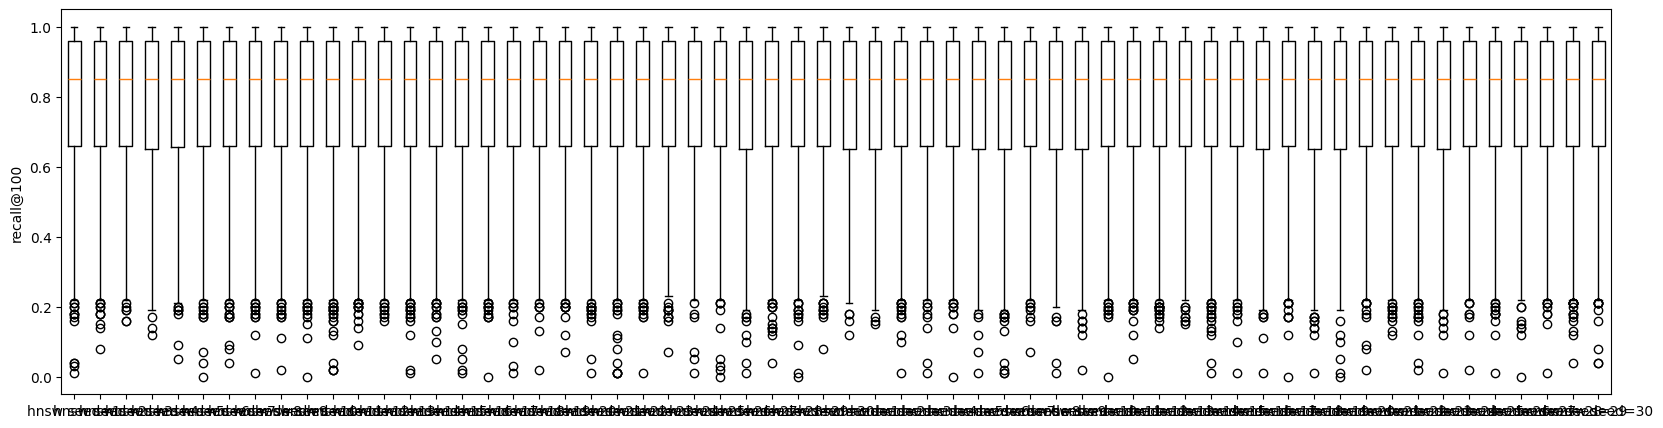

In [10]:
all_recalls = [recalls[(method_name, seed)] for method_name in METHOD_NAMES for seed in SEED_RANGE]

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
ax.set_ylabel('recall@100')
bplot = ax.boxplot(all_recalls, labels=[f"{method_name} seed={seed}" for method_name in METHOD_NAMES for seed in SEED_RANGE])

plt.show()

In [8]:
table = []
for method_name in METHOD_NAMES:
    method_recalls = []
    method_deltas = []
    for seed in SEED_RANGE:
        mean_recalls, s_recalls = get_mean_and_sd(recalls[(method_name, seed)])
        method_recalls.append(mean_recalls)
        mean_deltas, s_deltas = get_mean_and_sd(deltas[(method_name, seed)])
        method_deltas.append(mean_deltas)
    mean_recalls, s_recalls = get_mean_and_sd(method_recalls)
    mean_deltas, s_deltas = get_mean_and_sd(method_deltas)
    table.append((method_name, mean_recalls, s_recalls, mean_deltas, s_deltas))
table.sort(key=lambda row: row[1], reverse=True)

In [9]:
print(tabulate(table, headers=["method", "recall@100", "SD", "query time (s)", "SD"]))

method      recall@100           SD    query time (s)          SD
--------  ------------  -----------  ----------------  ----------
hnsw          0.793298  0.000267683       0.00165318   0.00339117
hcnsw         0.792997  0.000197085       0.000259652  0.00271908


In [11]:
table = []
for method_name in METHOD_NAMES:
    method_recalls = []
    method_deltas = []
    for seed in SEED_RANGE:
        method_recalls += list(recalls[(method_name, seed)])
        method_deltas += list(deltas[(method_name, seed)])
    mean_recalls, s_recalls = get_mean_and_sd(method_recalls)
    mean_deltas, s_deltas = get_mean_and_sd(method_deltas)
    table.append((method_name, mean_recalls, s_recalls, mean_deltas, s_deltas))
table.sort(key=lambda row: row[1], reverse=True)

In [12]:
print(tabulate(table, headers=["method", "recall@100", "SD", "query time (s)", "SD"]))

method      recall@100        SD    query time (s)        SD
--------  ------------  --------  ----------------  --------
hnsw          0.793298  0.191577       0.00165318   0.545238
hcnsw         0.792997  0.191935       0.000259652  0.534332


In [16]:
table = []
for method_name in METHOD_NAMES:
    for seed in SEED_RANGE:
        recalls_under_05 = 0
        recalls_under_03 = 0
        mean_recalls, s_recalls = get_mean_and_sd(recalls[(method_name, seed)])
        for recall in recalls[(method_name, seed)]:
            if recall < 0.5:
                recalls_under_05 += 1
                if recall < 0.3:
                    recalls_under_03 += 1
        table.append((method_name, seed, mean_recalls, s_recalls, recalls_under_05, recalls_under_03))
table.sort(key=lambda row: row[2], reverse=True)
table.sort(key=lambda row: row[4])
table.sort(key=lambda row: row[5])

In [17]:
print(tabulate(table, headers=["method", "seed", "recall@100", "SD", "recalls < 0.5", "recalls < 0.3"]))

method      seed    recall@100        SD    recalls < 0.5    recalls < 0.3
--------  ------  ------------  --------  ---------------  ---------------
hnsw          19      0.793492  0.190956             1005               54
hnsw           1      0.79336   0.191734             1039               59
hnsw          20      0.79353   0.190991              987               60
hnsw          26      0.793     0.191638             1005               61
hcnsw         25      0.793406  0.191482             1019               61
hcnsw         20      0.793     0.191872             1020               61
hnsw          10      0.793277  0.191354             1005               62
hcnsw         16      0.792826  0.191747             1012               62
hnsw          25      0.793816  0.190752              995               63
hcnsw         11      0.793186  0.191791             1022               64
hnsw          30      0.79355   0.191202             1017               65
hcnsw         30      0.7

In [13]:
table = []
for method_name in METHOD_NAMES:
    method_recalls_under_05 = []
    method_recalls_under_03 = []
    for seed in SEED_RANGE:
        recalls_under_05 = 0
        recalls_under_03 = 0
        for recall in recalls[(method_name, seed)]:
            if recall < 0.5:
                recalls_under_05 += 1
                if recall < 0.3:
                    recalls_under_03 += 1
        method_recalls_under_05.append(recalls_under_05)
        method_recalls_under_03.append(recalls_under_03)
    mean_recalls_05, s_recalls_05 = get_mean_and_sd(method_recalls_under_05)
    mean_recalls_03, s_recalls_03 = get_mean_and_sd(method_recalls_under_03)
    table.append((method_name, mean_recalls_05, s_recalls_05, mean_recalls_03, s_recalls_03))
table.sort(key=lambda row: row[1])
table.sort(key=lambda row: row[3])

In [14]:
print(tabulate(table, headers=["method", "recalls < 0.5", "SD", "recalls < 0.3", "SD"]))

method      recalls < 0.5       SD    recalls < 0.3       SD
--------  ---------------  -------  ---------------  -------
hnsw              1008.77  13.9103          69.4333  6.92165
hcnsw             1016.73  10.4153          70.9     5.7196


In [15]:
for method_name in METHOD_NAMES:
    for seed in SEED_RANGE:
        for i, delta in enumerate(deltas[(method_name, seed)]):
            if delta < 0.00001:
                print(f"method={method_name} seed={seed} time={delta} recall={recalls[(method_name, seed)][i]}")

method=hnsw seed=2 time=-60.708194971084595 recall=0.84
method=hnsw seed=5 time=-60.65636348724365 recall=0.77
method=hnsw seed=6 time=-60.56712865829468 recall=0.52
method=hnsw seed=8 time=-60.386693239212036 recall=0.87
method=hnsw seed=9 time=-60.29426312446594 recall=1.0
method=hnsw seed=22 time=-59.05870842933655 recall=0.94
method=hnsw seed=23 time=-58.961491107940674 recall=0.78
method=hnsw seed=28 time=-58.478697538375854 recall=0.91
method=hnsw seed=30 time=-58.282315254211426 recall=0.57
method=hcnsw seed=5 time=-60.66545128822327 recall=0.99
method=hcnsw seed=6 time=-60.57545065879822 recall=0.53
method=hcnsw seed=7 time=-60.48610472679138 recall=0.67
method=hcnsw seed=9 time=-60.30385971069336 recall=0.99
method=hcnsw seed=11 time=-60.1147301197052 recall=0.61
method=hcnsw seed=12 time=-60.0209219455719 recall=0.92
method=hcnsw seed=15 time=-59.73856067657471 recall=1.0
method=hcnsw seed=16 time=-59.64535856246948 recall=0.97
method=hcnsw seed=23 time=-58.9699764251709 reca